# 1 - Introduction

Credit by  : 
  - Enggar Kristian 
  - Wahyudi

**Batch : FTDS - 012** 

**Objective : Final project, to predict sentiment analysis Twitter**

# 2 - Import Libraries

In [176]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [177]:
# masuk folder "model_ml_dl"
% cd /content/gdrive/MyDrive/model_dl_ml

/content/gdrive/MyDrive/model_dl_ml


In [178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import joblib
import pickle
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_validate
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from pathlib import Path
from imblearn.over_sampling import RandomOverSampler

# Evaluate Classification Models
from sklearn.metrics import classification_report, roc_auc_score, auc, RocCurveDisplay, roc_curve, accuracy_score
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

import tensorflow as tf 
from tensorflow import keras
import pathlib
!pip install -q pysastrawi
from sklearn.metrics import confusion_matrix ,accuracy_score
np.random.seed(15)
tf.random.set_seed(15)
import re # for preprocessing text
import string # for preprocessing text
from sklearn.feature_extraction.text import CountVectorizer # to create Bag of words
import nltk # for processing texts
from nltk.corpus import stopwords # list of stop words
from wordcloud import WordCloud,STOPWORDS
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from tensorflow.keras.layers import TextVectorization, Embedding
from tensorflow.keras.layers import Dense, Conv1D, GlobalAveragePooling1D, MaxPooling1D, Input, LSTM, GRU, SpatialDropout1D, Dense, Dropout, Masking, Embedding, Flatten, Input, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical

!pip install -q pysastrawi
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [179]:
tf.__version__

'2.8.2'

In [180]:
sklearn.__version__

'1.0.2'

# 3 - Data Loading

In [181]:
data = pd.read_csv("https://raw.githubusercontent.com/IanNarsa/sentiment-analysis/master/data/testSentimen.csv",header=None).rename({0:'sentimen',1:'text'},axis=1)
data.head()

,sentimen,text
0,|positive|,|@PrincessSuperC Hai Cici tersayang! Cuma mau ...
1,|positive|,|@Msdebramaye Saya mendengar tentang kontes it...
2,|positive|,|UNC!!! Pemenang NCAA!! Franklin St.: I ADA DI...
3,|positive|,|@DivHumas_Polri: Hoax dan Ujaran Kebencian da...
4,|positive|,|@DivHumas_Polri: Polri : Reuni 212 Berjalan K...


In [182]:
# Size
data.shape

(3709, 2)

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  3709 non-null   object
 1   text      3709 non-null   object
dtypes: object(2)
memory usage: 58.1+ KB


In [184]:
# Know about unique all columns in dataset
for col in data:
    print(f'{col}: {data[col].unique()}')

sentimen: ['|positive|' '|neutral|' '|negative|' '|netral|']
text: ['|@PrincessSuperC Hai Cici tersayang! Cuma mau memberitaukan kalau saya cinta kamu! OH! Dan akan berkunjung secepatnya? Fantasi berkendari 5 Mei!!!!|'
 '|@Msdebramaye Saya mendengar tentang kontes itu! Selamat teman!!|'
 '|UNC!!! Pemenang NCAA!! Franklin St.: I ADA DISANA!! SANGAT SERU!!!!!! Ini adalah yang terbaik...yang pernah ada http://tinyurl.com/49955t3|'
 ... '|yeah|' '|yihaa|' '|islam|']


In [185]:
# Copy dataset that can use to modification dataset
data_copy = data.copy() 
data_copy.tail()

,sentimen,text
3704,|positive|,|yay|
3705,|positive|,|yeah|
3706,|positive|,|yihaa|
3707,|negative|,|dungu|
3708,|netral|,|islam|


In [186]:
data_copy = data_copy[data_copy["sentimen"] != "|netral|"]
data_copy.tail()

,sentimen,text
3703,|positive|,|yakin|
3704,|positive|,|yay|
3705,|positive|,|yeah|
3706,|positive|,|yihaa|
3707,|negative|,|dungu|


# 4 - Exploratory Data Analysis (EDA)

In [187]:
data_copy['sentimen'].value_counts()

|negative|    2570
|positive|     982
|neutral|      156
Name: sentimen, dtype: int64

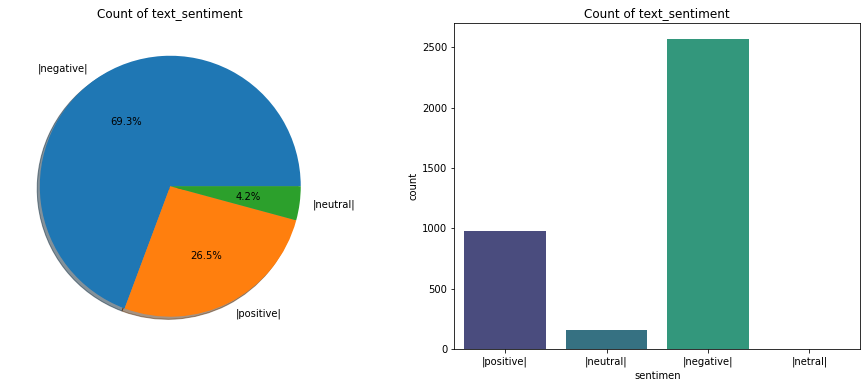

In [188]:
f,ax=plt.subplots(1,2,figsize=(16,6))
data_copy['sentimen'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[1].set_title('Count of Text Sentiment')
ax[0].set_title('Count of text_sentiment')
ax[0].set_ylabel('')
sns.countplot('sentimen',data=data,ax=ax[1], palette = 'viridis')
ax[1].set_title('Count of text_sentiment')
plt.show()

# 5 - Data Preprocessing

## Clean text


In this Natural Language Program, the data is tabular which contains text and sentiment labels. The text will be cleaned of annoying noise such as punctuation marks, numbers, special words, links, and others. So below I will do data cleaning.

In [189]:
# let's take a sample one text
data_copy['text'][50]


'|RT @Diezpung1: Ntah Karena Video Sy Soal Bib Bahar.Atau Video Pak @prabowo Soal Ucapn S.A.W Yg  Sy Posting D Group Oposisi Td Dapat Inbox A\\xe2\\x80\\xa6|'

In [190]:
def clean_text(text):
  '''
  DESCRIPTION:
  This function to clean text 
  INPUT: 
  text: string
  OUTPUT: 
  text: string after clean it
  ''' 
  text = text.lower() # convert letters to lower case
  text = re.sub("@[A-Za-z0-9_]+"," ", text) #r emove mention
  text = re.sub("#[A-Za-z0-9_]+"," ", text) # remove hashtag
  text = re.sub(r"\\n"," ",text) # remove \n
  text = re.sub("[^a-zA-Z]", " ", text) # remove non-letters
  text = re.sub(r'\d+', '', text) # remove number
  text = re.sub(r'http\S+', '', text) # remove links
  text = re.sub(r"www.\S+", " ", text) # remove link
  text = re.sub("rt"," ",text) # remove RT
  text = text.translate(str.maketrans('','', string.punctuation)) # remove punctuation
  text = re.sub(' +', ' ',text) # remove extra space
  text = text.strip() # remove whitespaces

  # remove stopwords
  stpwds_id = list(set(stopwords.words('indonesian')))
  stpwds_id.append('oh')

  tokens = word_tokenize(text)

  text = ' '.join([word for word in tokens if word not in stpwds_id])

  # Stemming
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  text = stemmer.stem(text)

  return text

- Create functions with regex to convert letters to lowercase, remove numbers, punctuation marks, special words, links, stickers and others. so that the machine can read a text one by one word from a sentence which later the word is converted into numbers.

- Then use stopwords, which is to eliminate affixes that often appear in English if the machine doesn't need to train it or you could say it reduces words to make the machine work more efficiently.

- After removing noise by regex and reducing words with stopwords, word tokenize is done to make a sentence into a vector per word.

- And be a function for cleaning text that serves to add results from training data created by deep learning models.

In [191]:
%%time
# The cleaning function applied in all reviews
data_copy['text_processed'] = data_copy['text'].apply(lambda x: clean_text(x))


CPU times: user 23 s, sys: 317 ms, total: 23.3 s
Wall time: 23.4 s


Apply function to dataset

In [192]:
data_copy['text_processed'][50]

'ntah video sy bib bahar video ucapn s a w yg sy posting d group oposisi td inbox a xe x xa'

Well all text it should be clean from regex, and stopwords library.

In [193]:
data_copy.sentimen.unique()

array(['|positive|', '|neutral|', '|negative|'], dtype=object)

In [194]:
data_copy['label'] = data_copy['sentimen'].replace({'|neutral|' : 0, '|negative|' : 1, '|positive|' : 2})
data_copy

,sentimen,text,text_processed,label
0,|positive|,|@PrincessSuperC Hai Cici tersayang! Cuma mau ...,hai cici sayang memberitaukan cinta kunjung ce...,2
1,|positive|,|@Msdebramaye Saya mendengar tentang kontes it...,dengar kontes selamat teman,2
2,|positive|,|UNC!!! Pemenang NCAA!! Franklin St.: I ADA DI...,unc menang ncaa franklin st i sana seru baik h...,2
3,|positive|,|@DivHumas_Polri: Hoax dan Ujaran Kebencian da...,hoax ujar benci ancam satu lapor janban sebar ...,2
4,|positive|,|@DivHumas_Polri: Polri : Reuni 212 Berjalan K...,polri reuni jalan kondusif t co dxwujk g,2
...,...,...,...,...
3703,|positive|,|yakin|,,2
3704,|positive|,|yay|,yay,2
3705,|positive|,|yeah|,yeah,2
3706,|positive|,|yihaa|,yihaa,2


Replace the label be a numeric from categorical:
- Neutral = 0
- Negative = 1
- Positive = 2


## Splitting Dataset

In [222]:
# random state
random_state=5

# Splitting dataset
X_train_full, X_test,  y_train_full, y_test = train_test_split(data_copy.text_processed,
                                                               data_copy.label,
                                                               test_size=0.2, random_state=random_state)

X_train, X_val, y_train, y_val = train_test_split(X_train_full,
                                                  y_train_full,
                                                  test_size=0.33, random_state=random_state)

print("Training data shape: {}".format(X_train.shape))
print("Validation data shape: {}".format(X_val.shape))
print("Testing data shape: {}".format(X_test.shape))

Training data shape: (1987,)
Validation data shape: (979,)
Testing data shape: (742,)


In [223]:
ros = RandomOverSampler()
X_train_balanced, y_train_balanced = ros.fit_resample(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1));
X_val_balanced, y_val_balanced = ros.fit_resample(np.array(X_val).reshape(-1, 1), np.array(y_val).reshape(-1, 1));

print('X_train shape berfore oversampling :', X_train.shape)
print('y_train shape berfore oversampling :', y_train.shape)
print('X_val shape berfore oversampling   :', X_val.shape)
print('y_val shape berfore oversampling   :', y_val.shape)

X_train shape berfore oversampling : (1987,)
y_train shape berfore oversampling : (1987,)
X_val shape berfore oversampling   : (979,)
y_val shape berfore oversampling   : (979,)


In [224]:
# print shape after oversampling
print('X_train_balanced shape after oversampling:', X_train_balanced.shape)
print('y_train_balanced shape after oversampling:', y_train_balanced.shape)
print('X_val_balanced shape after oversampling:', X_val_balanced.shape)
print('y_val_balanced shape after oversampling:', y_val_balanced.shape)

X_train_balanced shape after oversampling: (4140, 1)
y_train_balanced shape after oversampling: (4140,)
X_val_balanced shape after oversampling: (2070, 1)
y_val_balanced shape after oversampling: (2070,)


In [209]:
# X_train_balanced = pd.DataFrame(X_train_balanced)
# X_val_balanced = pd.DataFrame(X_val_balanced)
# y_train_balanced = pd.DataFrame(y_train_balanced)
# y_val_balanced = pd.DataFrame(y_val_balanced)

## Tokenization & Word Embedding

In [212]:
# Change object type be numerical
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_val_vec = Vectorize.transform(X_val)
X_test_vec = Vectorize.transform(X_test)

print(X_train_vec)

  (0, 983)	1
  (0, 1773)	1
  (1, 440)	1
  (2, 1621)	1
  (3, 1200)	1
  (4, 870)	1
  (5, 562)	1
  (6, 1647)	1
  (7, 712)	1
  (8, 380)	1
  (8, 241)	1
  (8, 1563)	1
  (8, 2047)	1
  (8, 1183)	1
  (8, 1321)	2
  (8, 2034)	1
  (8, 2028)	1
  (8, 313)	1
  (8, 474)	1
  (9, 1592)	1
  (10, 969)	1
  (11, 1149)	1
  (12, 388)	1
  (13, 715)	1
  (14, 1670)	1
  :	:
  (1979, 2028)	1
  (1979, 314)	1
  (1979, 1218)	1
  (1979, 1024)	1
  (1979, 697)	1
  (1979, 784)	1
  (1979, 1620)	1
  (1979, 333)	1
  (1979, 1874)	1
  (1981, 598)	1
  (1982, 1746)	1
  (1983, 662)	1
  (1984, 1603)	1
  (1985, 254)	1
  (1986, 2034)	1
  (1986, 2028)	1
  (1986, 378)	1
  (1986, 218)	1
  (1986, 297)	1
  (1986, 1861)	1
  (1986, 26)	1
  (1986, 1503)	1
  (1986, 1611)	1
  (1986, 258)	1
  (1986, 2042)	1


Well after transform to numerik, it turns out that from the raw data of 3707 rows it turns out that the engine only detects 1986 different words in this dataset

In [213]:
# after we do transform to numerik, we should change to weight each words
Transformer = TfidfTransformer()

X_train_tfidf = Transformer.fit_transform(X_train_vec)
X_val_tfidf = Transformer.transform(X_val_vec)
X_test_tfidf = Transformer.transform(X_test_vec)

print(X_train_tfidf)

  (0, 1773)	0.7822716912280103
  (0, 983)	0.6229373974190893
  (1, 440)	1.0
  (2, 1621)	1.0
  (3, 1200)	1.0
  (4, 870)	1.0
  (5, 562)	1.0
  (6, 1647)	1.0
  (7, 712)	1.0
  (8, 2047)	0.2130871686887883
  (8, 2034)	0.14186945873360537
  (8, 2028)	0.14186945873360537
  (8, 1563)	0.31515278225028065
  (8, 1321)	0.6303055645005613
  (8, 1183)	0.28601199605807387
  (8, 474)	0.33219904941425443
  (8, 380)	0.31515278225028065
  (8, 313)	0.16410962328869144
  (8, 241)	0.31515278225028065
  (9, 1592)	1.0
  (10, 969)	1.0
  (11, 1149)	1.0
  (12, 388)	1.0
  (13, 715)	1.0
  (14, 1670)	0.7751385565921614
  :	:
  (1979, 2028)	0.16013025441445017
  (1979, 1874)	0.3557178243410414
  (1979, 1620)	0.3557178243410414
  (1979, 1218)	0.29858614863738914
  (1979, 1024)	0.3557178243410414
  (1979, 784)	0.3557178243410414
  (1979, 697)	0.34206655347344767
  (1979, 333)	0.3557178243410414
  (1979, 314)	0.3314778051535201
  (1981, 598)	1.0
  (1982, 1746)	1.0
  (1983, 662)	1.0
  (1984, 1603)	1.0
  (1985, 254)	1.0
 

The data has change, and ready to modeling!

## Embedding Layer in Deep Learning with Tensorflow

In [214]:
# Want to know how many vocab and maximum words in a text
total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("Length vocab:",total_vocab)
print("Length Maximum Text:",max_sen_len,"words")

Length vocab: 2059
Length Maximum Text: 33 words


- Want to know size of total vocabulary that will be to input shape in model definition
- Well there is 2559 vocabulary in dataset and theres 33  words in one text in the dataset.

In [226]:
# define vocab than convert to numeric
text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,) # if i want to use sequential API
                                       )

text_vectorization.adapt(X_train) # adapt looks like fit

In [227]:
# let's check the result vectorization
data_copy.text_processed[50]

'ntah video sy bib bahar video ucapn s a w yg sy posting d group oposisi td inbox a xe x xa'

In [228]:
# after convert it
text_vectorization([data_copy.text_processed[0]])

<tf.Tensor: shape=(1, 33), dtype=int64, numpy=
array([[  1,   1, 121,   1, 376,   1,  55,   1,   1,   1,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0]])>

In [229]:
# Change the numerical to weight with embedding
embedding = Embedding(input_dim=total_vocab,
                      output_dim=256,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

In [230]:
# see the result
emb_res = embedding(text_vectorization([data_copy.text_processed[50]]))
emb_res

<tf.Tensor: shape=(1, 33, 256), dtype=float32, numpy=
array([[[-0.02614838,  0.02162692,  0.00152751, ..., -0.04737439,
          0.01064372,  0.04658816],
        [-0.01922429, -0.01815715, -0.00270333, ..., -0.00474864,
         -0.00274583, -0.04233151],
        [ 0.02565085, -0.04314666, -0.00330631, ..., -0.02277677,
          0.00625986, -0.02758278],
        ...,
        [ 0.04200996, -0.02586603, -0.04366267, ...,  0.0448379 ,
         -0.02886525, -0.00592061],
        [ 0.04200996, -0.02586603, -0.04366267, ...,  0.0448379 ,
         -0.02886525, -0.00592061],
        [ 0.04200996, -0.02586603, -0.04366267, ...,  0.0448379 ,
         -0.02886525, -0.00592061]]], dtype=float32)>

Dataset has converted. Embedding looks like scaling in feature engineering. 

In [231]:
# let's check weight word "bulls"
emb_res[0][10]

<tf.Tensor: shape=(256,), dtype=float32, numpy=
array([ 0.03597661, -0.04737327, -0.04780925,  0.00415293, -0.04209354,
       -0.00077691, -0.03086089,  0.01147295,  0.01924217, -0.0339277 ,
        0.00344659,  0.01866751,  0.03358742,  0.00126201, -0.00272628,
       -0.00646226,  0.00803546,  0.01251883, -0.01118617,  0.02378602,
        0.00290531, -0.03645539, -0.01382512,  0.03536176,  0.0165734 ,
        0.03204259,  0.0126009 , -0.03160715,  0.04501735,  0.03555175,
        0.01057272, -0.01305938,  0.0267711 ,  0.02704198,  0.0359158 ,
       -0.00887115, -0.03426617, -0.0481129 , -0.04687858, -0.04729348,
       -0.01738391,  0.00413586,  0.04653564,  0.01086321, -0.02528409,
       -0.04431261,  0.03245934,  0.04937401,  0.0194273 , -0.02678515,
       -0.00085516, -0.02454798,  0.04318875,  0.03068325, -0.03880822,
        0.04741536,  0.01233343,  0.03422585,  0.00323556, -0.0079351 ,
       -0.04053035,  0.02300501,  0.03984829, -0.01853973,  0.04007003,
       -0.010493

well define the weight with embedding for each word in 256 dimensions.

## Get Dummies

Before we modeling, we will do dummy the target, this is looks like onehotencoder with manual coding. Labels will be a features after dummy according to its uniqueness, if a certain line is detected, the label will contain a value of 1

In [233]:
# convert label
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_train_balanced_ohe = to_categorical(y_train_balanced)
y_val_balanced_ohe = to_categorical(y_val_balanced)

y_test_ohe = to_categorical(y_test)

y_train_ohe

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

The result will be an array.

In [234]:
# if we looks in dataframe will be like this
pd.get_dummies(y_train)

,0,1,2
1567,0,1,0
927,0,1,0
3482,0,0,1
1699,0,1,0
1354,0,1,0
...,...,...,...
2286,0,1,0
1052,0,1,0
2729,0,1,0
3480,0,0,1


There are 3 uniques in column 'label' so will be define 3 features in dataframe.

# 6 - Model Training

## Model Gru

In [253]:
model = Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(GRU(32))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

model_gru_hist_1 = model.fit(X_train_balanced,
                         y_train_balanced_ohe,
                         epochs=50,
                         validation_data=(X_test, y_test_ohe))

Epoch 1/50
130/130 [==============================] - 3s 8ms/step - loss: 0.8391 - accuracy: 0.5510 - val_loss: 0.8899 - val_accuracy: 0.4987
Epoch 2/50
130/130 [==============================] - 1s 5ms/step - loss: 0.1206 - accuracy: 0.9536 - val_loss: 0.9944 - val_accuracy: 0.7183
Epoch 3/50
130/130 [==============================] - 1s 5ms/step - loss: 0.0929 - accuracy: 0.9587 - val_loss: 1.0987 - val_accuracy: 0.7102
Epoch 4/50
130/130 [==============================] - 1s 5ms/step - loss: 0.0861 - accuracy: 0.9621 - val_loss: 1.1273 - val_accuracy: 0.7129
Epoch 5/50
130/130 [==============================] - 1s 5ms/step - loss: 0.0898 - accuracy: 0.9589 - val_loss: 1.1432 - val_accuracy: 0.7116
Epoch 6/50
130/130 [==============================] - 1s 5ms/step - loss: 0.0835 - accuracy: 0.9647 - val_loss: 1.2271 - val_accuracy: 0.7062
Epoch 7/50
130/130 [==============================] - 1s 5ms/step - loss: 0.0854 - accuracy: 0.9601 - val_loss: 1.2920 - val_accuracy: 0.6941
Epoch 

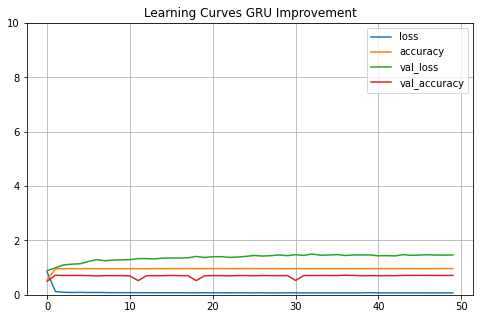

In [255]:
pd.DataFrame(model_gru_hist_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 10)
plt.title("Learning Curves GRU Improvement")
plt.show()

In [256]:
model.evaluate(X_test, y_test_ohe, batch_size=64)

12/12 [==============================] - 0s 3ms/step - loss: 1.4653 - accuracy: 0.7129


[1.4652951955795288, 0.7129380106925964]

In [257]:
yp_seq_gru_imp = model.predict(X_test)
yp_seq_gru_imp[:20]

array([[2.71331601e-06, 9.99881625e-01, 1.15648312e-04],
       [1.47649052e-05, 1.93852131e-04, 9.99791443e-01],
       [1.93822663e-04, 6.32673383e-01, 3.67132813e-01],
       [3.08609393e-04, 4.07823771e-01, 5.91867626e-01],
       [2.61706691e-06, 9.99887586e-01, 1.09747474e-04],
       [1.93822663e-04, 6.32673383e-01, 3.67132813e-01],
       [9.78439348e-05, 1.85629586e-03, 9.98045802e-01],
       [1.93822663e-04, 6.32673383e-01, 3.67132813e-01],
       [3.10445125e-06, 9.99855757e-01, 1.41109325e-04],
       [2.71094177e-06, 9.99882698e-01, 1.14605842e-04],
       [1.93822663e-04, 6.32673383e-01, 3.67132813e-01],
       [2.61614150e-06, 9.99887705e-01, 1.09648834e-04],
       [1.93822663e-04, 6.32673383e-01, 3.67132813e-01],
       [1.19048727e-05, 1.66214231e-04, 9.99821961e-01],
       [1.93822663e-04, 6.32673383e-01, 3.67132813e-01],
       [7.03522892e-05, 5.89352906e-01, 4.10576791e-01],
       [1.93822663e-04, 6.32673383e-01, 3.67132813e-01],
       [5.43299975e-05, 1.64701

In [258]:
# Test is the data right after splitting into train, test and val (shuffle was false in dataset so the order will match)
# Classification report
res_argmax_gru_imp = yp_seq_gru_imp.argmax(axis=1)
print('Classification Report (Model Sequential Improvement LSTM)')
print(classification_report(y_test, res_argmax_gru_imp, target_names=["Neutral", "Negative", "Positive"]))

Classification Report (Model Sequential Improvement LSTM)
              precision    recall  f1-score   support

     Neutral       0.67      0.48      0.56        29
    Negative       0.76      0.85      0.80       500
    Positive       0.55      0.42      0.47       213

    accuracy                           0.71       742
   macro avg       0.66      0.58      0.61       742
weighted avg       0.70      0.71      0.70       742



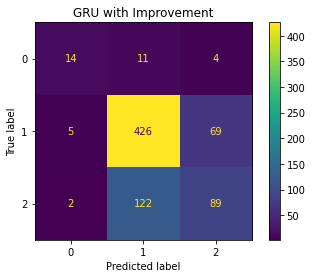

In [259]:
cm = confusion_matrix(y_test, res_argmax_gru_imp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title("GRU with Improvement")
plt.show()

## Model LSTM x Conv1D x DNN

In [244]:
model_lstm_1_imp = Sequential()
model_lstm_1_imp.add(text_vectorization)
model_lstm_1_imp.add(embedding)
model_lstm_1_imp.add(Conv1D(64, 5, activation='relu'))
model_lstm_1_imp.add(MaxPooling1D(pool_size=4))
model_lstm_1_imp.add(LSTM(64))
model_lstm_1_imp.add(Dense(256,activation='relu', kernel_regularizer=tf.keras.regularizers.L2(),
                      kernel_initializer=keras.initializers.RandomNormal(stddev=0.5)))
# model_lstm_1_imp.add(BatchNormalization())
# model_lstm_1_imp.add(Dropout(0.5))
# model_lstm_1_imp.add(Dense(128,activation='relu', kernel_regularizer=tf.keras.regularizers.L2(),
#                       kernel_initializer=keras.initializers.RandomNormal(stddev=0.5)))
# model_lstm_1_imp.add(BatchNormalization())
# model_lstm_1_imp.add(Dropout(0.5))
model_lstm_1_imp.add(Dense(3,activation='softmax'))

model_lstm_1_imp.compile(loss=keras.losses.categorical_crossentropy,
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                    metrics='accuracy')

In [245]:
%%time
model_lstm_hist_1_imp = model_lstm_1_imp.fit(X_train_balanced,
                         y_train_balanced_ohe, 
                         batch_size=64,
                         epochs=200,
                         shuffle=True,
                         validation_data=(X_val_balanced, y_val_balanced_ohe))

Epoch 1/200
65/65 [==============================] - 3s 15ms/step - loss: 41.8727 - accuracy: 0.5901 - val_loss: 41.4873 - val_accuracy: 0.5353
Epoch 2/200
65/65 [==============================] - 0s 6ms/step - loss: 40.7275 - accuracy: 0.8229 - val_loss: 40.6554 - val_accuracy: 0.5729
Epoch 3/200
65/65 [==============================] - 0s 6ms/step - loss: 39.6062 - accuracy: 0.9292 - val_loss: 40.2794 - val_accuracy: 0.5440
Epoch 4/200
65/65 [==============================] - 0s 7ms/step - loss: 38.6643 - accuracy: 0.9534 - val_loss: 39.8750 - val_accuracy: 0.5415
Epoch 5/200
65/65 [==============================] - 0s 6ms/step - loss: 37.8733 - accuracy: 0.9558 - val_loss: 39.4819 - val_accuracy: 0.5362
Epoch 6/200
65/65 [==============================] - 0s 6ms/step - loss: 37.1011 - accuracy: 0.9599 - val_loss: 38.7582 - val_accuracy: 0.5372
Epoch 7/200
65/65 [==============================] - 0s 6ms/step - loss: 36.3436 - accuracy: 0.9587 - val_loss: 37.8318 - val_accuracy: 0.542

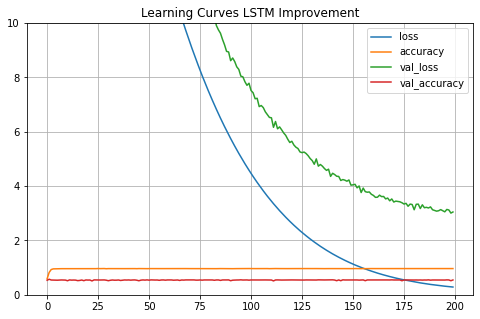

In [260]:
pd.DataFrame(model_lstm_hist_1_imp.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 10)
plt.title("Learning Curves LSTM Improvement")
plt.show()

In [261]:
model_lstm_1_imp.evaluate(X_test, y_test_ohe, batch_size=64)

12/12 [==============================] - 0s 3ms/step - loss: 1.5947 - accuracy: 0.7102


[1.5946706533432007, 0.7102425694465637]

In [262]:
yp_seq_lstm_imp = model_lstm_1_imp.predict(X_test)
yp_seq_lstm_imp[:20]

array([[3.9490956e-06, 9.9968469e-01, 3.1139384e-04],
       [1.1791661e-04, 5.5877218e-04, 9.9932337e-01],
       [4.6494414e-04, 6.6627115e-01, 3.3326396e-01],
       [7.3640852e-04, 4.4431728e-01, 5.5494630e-01],
       [3.9468946e-06, 9.9970502e-01, 2.9096415e-04],
       [4.6494414e-04, 6.6627115e-01, 3.3326396e-01],
       [3.0197724e-04, 1.0637945e-03, 9.9863416e-01],
       [4.6494414e-04, 6.6627115e-01, 3.3326396e-01],
       [4.1790090e-06, 9.9965358e-01, 3.4221288e-04],
       [3.9568904e-06, 9.9968624e-01, 3.0988079e-04],
       [4.6494414e-04, 6.6627115e-01, 3.3326396e-01],
       [3.9396482e-06, 9.9970514e-01, 2.9095533e-04],
       [4.6494414e-04, 6.6627115e-01, 3.3326396e-01],
       [1.1638154e-04, 6.2813592e-04, 9.9925548e-01],
       [4.6494414e-04, 6.6627115e-01, 3.3326396e-01],
       [9.8644173e-01, 1.2344947e-02, 1.2133619e-03],
       [4.6494414e-04, 6.6627115e-01, 3.3326396e-01],
       [4.8245120e-04, 5.4871994e-01, 4.5079759e-01],
       [3.7109602e-04, 2.641

In [263]:
# Test is the data right after splitting into train, test and val (shuffle was false in dataset so the order will match)
# Classification report
res_argmax_lstm_imp = yp_seq_lstm_imp.argmax(axis=1)
print('Classification Report (Model Sequential Improvement LSTM)')
print(classification_report(y_test, res_argmax_lstm_imp, target_names=["Neutral", "Negative", "Positive"]))

Classification Report (Model Sequential Improvement LSTM)
              precision    recall  f1-score   support

     Neutral       0.80      0.41      0.55        29
    Negative       0.76      0.86      0.81       500
    Positive       0.53      0.40      0.46       213

    accuracy                           0.71       742
   macro avg       0.70      0.56      0.60       742
weighted avg       0.70      0.71      0.70       742



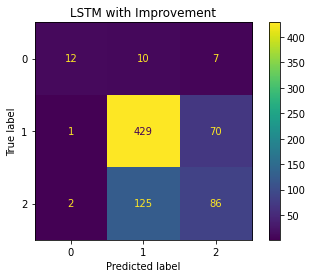

In [264]:
cm = confusion_matrix(y_test, res_argmax_lstm_imp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.title("LSTM with Improvement")
plt.show()

# 7 - Saving Model

In [279]:
# freeze model
for layer in model_lstm_1_imp.layers:
  layer.trainable = False


In [ ]:
# prepare directory for saving model
model_lstm_1_imp.save('model_auto_reply_tf')


# 8 - Model Inference

Based on the classification report, the model that gets the best accuracy is the Model LSTM x Conv1D x DNN after improvement. So I will decide to use the Model LSTM x Conv1D x DNN for data inference later so that the model can predict sentiment correctly and better, but it is not perfect.

In [289]:
twt = ["bank ini jelek banget deh"]

sentiment = model_lstm_1_imp.predict(twt)
if(np.argmax(sentiment) == 0):
    print("Neutral")
elif(np.argmax(sentiment) == 1):
    print("Negative")
elif(np.argmax(sentiment) == 2):
    print("Positive")

Negative
